In [62]:
pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import opendatasets as od

In [64]:
import pandas as pd

In [65]:

import os

In [66]:
od.download(
  "https://www.kaggle.com/datasets/kazanova/sentiment140")

#{"username":"ce040jaygajera","key":"48a0eb040f5f5a3b1f990b61f9294d05"}

Skipping, found downloaded files in "./sentiment140" (use force=True to force download)


In [67]:
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/sentiment140/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)

In [68]:
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [69]:
import nltk # Python library for NLP
from nltk.corpus import twitter_samples # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt # library for visualization
import random
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
nltk.download('stopwords')
import re
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come␣

from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
stopwords_english = stopwords.words('english')
print('Stop words\n')
print(stopwords_english)
print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [72]:
df["text"]

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [73]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [74]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    upset can't update Facebook texting it... migh...
2    @Kenichan I dived many times ball. Managed sav...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

In [75]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

1599995      Just woke up Having no school best feeling ever
1599996    TheWDBcom  Very cool hear old Walt interviews ...
1599997                  Are ready MoJo Makeover Ask details
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, dtype: object

In [76]:
df['text']

0          switchfoot httptwitpiccom2y1zl  Awww thats bum...
1          upset cant update Facebook texting it might cr...
2          Kenichan I dived many times ball Managed save ...
3                           whole body feels itchy like fire
4          nationwideclass no its not behaving all im mad...
                                 ...                        
1599995      Just woke up Having no school best feeling ever
1599996    TheWDBcom  Very cool hear old Walt interviews ...
1599997                  Are ready MoJo Makeover Ask details
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, Length: 1600000, dtype: object

In [77]:
df

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl Awww thats bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update Facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times ball Managed save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving all im mad...
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool hear old Walt interviews ...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are ready MoJo Makeover Ask details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday boo alll time Tupac Amaru ...


In [78]:
df["sentiment"] = df["sentiment"].replace(4,1)

In [79]:
df

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl Awww thats bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update Facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times ball Managed save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving all im mad...
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school best feeling ever
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool hear old Walt interviews ...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are ready MoJo Makeover Ask details
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday boo alll time Tupac Amaru ...


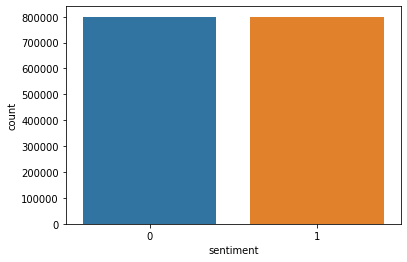

In [80]:
import seaborn as sns
sns.countplot(x="sentiment",data=df)


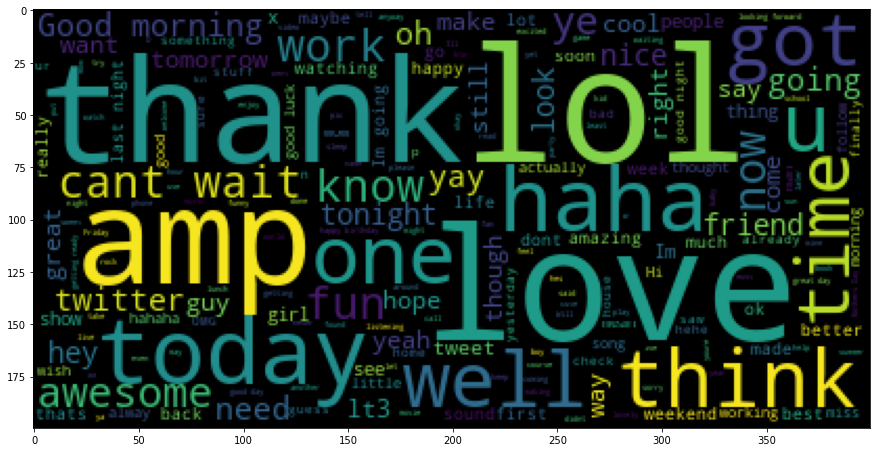

In [81]:
from wordcloud import WordCloud, STOPWORDS


positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

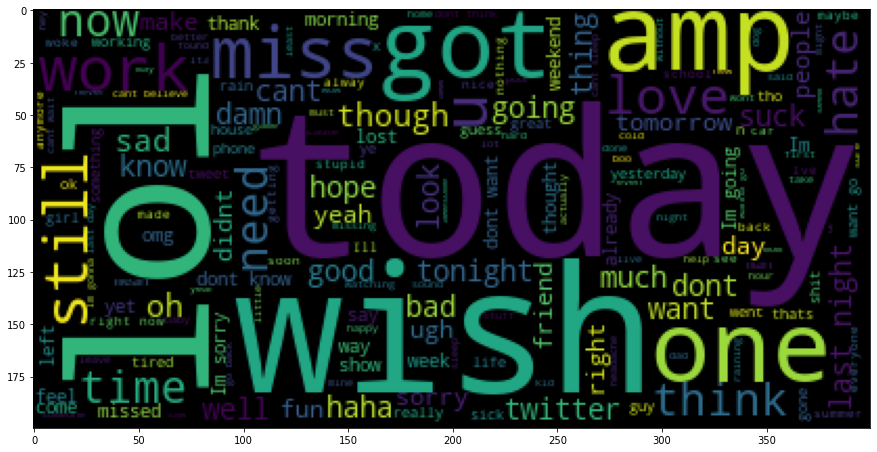

In [82]:
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

document = ["One Geek helps Two Geeks",
			"Two Geeks help Four Geeks",
			"Each Geek helps many other Geeks at GeeksforGeeks"]

# Create a Vectorizer Object
vectorizer = CountVectorizer()

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


Vocabulary:  {'one': 9, 'geek': 3, 'helps': 7, 'two': 11, 'geeks': 4, 'help': 6, 'four': 2, 'each': 1, 'many': 8, 'other': 10, 'at': 0, 'geeksforgeeks': 5}
Encoded Document is:
[[0 0 0 1 1 0 0 1 0 1 0 1]
 [0 0 1 0 2 0 1 0 0 0 0 1]
 [1 1 0 1 1 1 0 1 1 0 1 0]]


In [84]:
vectorizer = CountVectorizer()

vectorizer.fit(df["text"])

CountVectorizer()

In [85]:
print(vectorizer.fit(df["text"]))

CountVectorizer()


In [86]:
vectorizer.vocabulary_

{'switchfoot': 727473,
 'httptwitpiccom2y1zl': 341173,
 'awww': 65512,
 'thats': 741149,
 'bummer': 109295,
 'you': 834942,
 'shoulda': 682342,
 'got': 267117,
 'david': 170486,
 'carr': 119922,
 'third': 749237,
 'day': 171609,
 'it': 384775,
 'upset': 785644,
 'cant': 116956,
 'update': 784943,
 'facebook': 225786,
 'texting': 739273,
 'might': 505892,
 'cry': 158782,
 'result': 639203,
 'school': 665502,
 'today': 758131,
 'also': 37757,
 'blah': 89918,
 'kenichan': 427948,
 'dived': 187246,
 'many': 484885,
 'times': 754358,
 'ball': 70791,
 'managed': 483162,
 'save': 663142,
 '50': 12117,
 'the': 741433,
 'rest': 638923,
 'go': 263261,
 'bounds': 98434,
 'whole': 810083,
 'body': 94476,
 'feels': 231559,
 'itchy': 385074,
 'like': 457935,
 'fire': 235625,
 'nationwideclass': 539093,
 'no': 551060,
 'its': 385705,
 'not': 554177,
 'behaving': 79467,
 'all': 35150,
 'im': 374684,
 'mad': 478576,
 'here': 288959,
 'see': 669699,
 'over': 572354,
 'there': 745987,
 'kwesidei': 441972

In [87]:
 vector=vectorizer.transform(df["text"])
 

In [88]:
# splitting the features into train and test

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X=vector
y=df["sentiment"]

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                   random_state=40, 
                                   test_size=0.5, 
                                   shuffle=True)

In [100]:
from sklearn.naive_bayes import MultinomialNB


In [101]:
 clf = MultinomialNB(alpha=0.1)

In [102]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [103]:
predictions=clf.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,predictions))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.76482
precision: [0.75069614 0.78064217]
recall: [0.79312129 0.7365081 ]


In [105]:
df=df.sample(20000)

In [106]:
df


,sentiment,id,date,query,user_id,text
552431,0,2203397523,Tue Jun 16 23:39:03 PDT 2009,NO_QUERY,thorgalsen,laying bed 2 12 hours cant sleep thinking futu...
351801,0,2018828300,Wed Jun 03 10:34:30 PDT 2009,NO_QUERY,Arvuitton,Please curve damn test
1182194,1,1982215072,Sun May 31 10:45:35 PDT 2009,NO_QUERY,StephMarieSmith,chillin momster deck love love
1105495,1,1971293464,Sat May 30 06:44:51 PDT 2009,NO_QUERY,kjjj1234,After morning errands going downtown enjoy lun...
1384248,1,2052641104,Sat Jun 06 01:27:29 PDT 2009,NO_QUERY,danieljturner,going car shopping time upgrade family size
...,...,...,...,...,...,...
1563705,1,2187135925,Mon Jun 15 19:50:31 PDT 2009,NO_QUERY,ajsnoopy06,fun visiting Heather hanging lunch ltaShDaRgt
1183215,1,1982383770,Sun May 31 11:06:00 PDT 2009,NO_QUERY,JBlover4,Listening Paranoid I love song
63941,0,1687834448,Sun May 03 09:42:16 PDT 2009,NO_QUERY,candace85,sunday funday coconuttts last day
1306025,1,2011523961,Tue Jun 02 19:09:17 PDT 2009,NO_QUERY,KimmyGeezy,Ready settle watch movie


In [107]:
vectorizer = CountVectorizer()

vectorizer.fit(df["text"])


CountVectorizer()

In [108]:
vectorizer.vocabulary_

{'laying': 16904,
 'bed': 3196,
 '12': 93,
 'hours': 12935,
 'cant': 4869,
 'sleep': 26797,
 'thinking': 29324,
 'future': 10743,
 'much': 19884,
 'feeling': 9870,
 'ill': 14163,
 'sleeping': 26806,
 'alarm': 1368,
 'fml': 10241,
 'please': 22601,
 'curve': 6928,
 'damn': 7077,
 'test': 28986,
 'chillin': 5518,
 'momster': 19485,
 'deck': 7450,
 'love': 17707,
 'after': 1153,
 'morning': 19609,
 'errands': 9241,
 'going': 11326,
 'downtown': 8334,
 'enjoy': 9113,
 'lunch': 17856,
 'bistro': 3567,
 '333': 414,
 'part': 21866,
 'milwaukees': 19123,
 'dining': 7900,
 'week': 31799,
 'yum': 33089,
 'car': 4905,
 'shopping': 26382,
 'time': 29550,
 'upgrade': 30908,
 'family': 9708,
 'size': 26693,
 'maddiehartloff': 18005,
 'rock': 24946,
 'its': 14731,
 'ok': 21179,
 'didnt': 7834,
 'win': 32155,
 'real': 24157,
 'life': 17179,
 'youll': 33010,
 'memories': 18813,
 'hold': 12718,
 'im': 14208,
 'bummed': 4528,
 'my': 20038,
 'scene': 25662,
 'patricia': 21938,
 'arquette': 2252,
 'got': 1

In [109]:
 vector=vectorizer.transform(df["text"])
 

In [110]:
X=vector
y=df["sentiment"]

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.5, 
                                   shuffle=True)

In [112]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6888

In [114]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: [0.67858446 0.70119522]
recall: [0.73372781 0.64259635]
